In [ ]:
"""
Linear Algebra in Machine Learning: A Comprehensive Demonstration
==================================================================
This code demonstrates key linear algebra concepts with a practical ML use case:
- One example Dimensionality reduction of handwritten digit images using PCA
"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time

# Set random seed for reproducibility
np.random.seed(42)


# ============================================================================
# PART 1: VECTOR OPERATIONS
# ============================================================================

def demonstrate_vector_operations():
    """Demonstrate basic vector operations used in ML"""
    print("=" * 80)
    print("PART 1: VECTOR OPERATIONS")
    print("=" * 80)

    # Vectors representing feature vectors in ML
    v1 = np.array([1, 2, 3, 4])
    v2 = np.array([5, 6, 7, 8])

    print(f"\nVector 1: {v1}")
    print(f"Vector 2: {v2}")

    # Dot product (similarity measure in ML)
    dot_product = np.dot(v1, v2)
    print(f"\nDot Product (similarity): {dot_product}")

    # Vector magnitude (L2 norm) # Euclidean #
    magnitude_v1 = np.linalg.norm(v1)
    print(f"Magnitude of v1 (L2 norm/ Euclidean): {magnitude_v1:.4f}")

    # Cosine similarity (used in recommendation systems)
    cosine_sim = dot_product / (np.linalg.norm(v1) * np.linalg.norm(v2))
    print(f"Cosine Similarity: {cosine_sim:.4f}")

    # Vector projection (used in dimensionality reduction)
    projection = (np.dot(v1, v2) / np.dot(v2, v2)) * v2
    print(f"Projection of v1 onto v2: {projection}")

    return v1, v2



In [ ]:
demonstrate_vector_operations()

PART 1: VECTOR OPERATIONS

Vector 1: [1 2 3 4]
Vector 2: [5 6 7 8]

Dot Product (similarity): 70
Magnitude of v1 (L2 norm/ Euclidean): 5.4772
Cosine Similarity: 0.9689
Projection of v1 onto v2: [2.01149425 2.4137931  2.81609195 3.2183908 ]


(array([1, 2, 3, 4]), array([5, 6, 7, 8]))

In [ ]:
# ============================================================================
# PART 2: EIGENVALUES AND EIGENVECTORS
# ============================================================================

def demonstrate_eigen_decomposition():
    """Demonstrate eigenvalue decomposition with a covariance matrix"""
    print("\n" + "=" * 80)
    print("PART 2: EIGENVALUES AND EIGENVECTORS")
    print("=" * 80)

    # Create a sample covariance matrix (symmetric positive semi-definite)
    # This represents correlations between features in a dataset
    cov_matrix = np.array([
        [4.0, 2.0, 0.5],
        [2.0, 3.0, 1.0],
        [0.5, 1.0, 2.0]
    ])

    print("\nCovariance Matrix:")
    print(cov_matrix)

    # Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    print("\nEigenvalues (variance explained by each principal component):")
    for i, val in enumerate(eigenvalues):
        print(f"  λ{i + 1} = {val:.4f}")

    print("\nEigenvectors (principal component directions):")
    for i in range(len(eigenvectors)):
        print(f"  v{i + 1} = {eigenvectors[:, i]}")

    # Verify: A * v = λ * v
    print("\nVerification (A*v = λ*v for first eigenvector):")
    Av = cov_matrix @ eigenvectors[:, 0]
    lambda_v = eigenvalues[0] * eigenvectors[:, 0]


    print(f"  A*v = {Av}")
    print(eigenvalues[0], eigenvectors[:, 0])
    print(f"  λ*v = {lambda_v}")
    print(f"  Equal => {np.allclose(Av, lambda_v)}")

    # Verify all eigenvectors
    print("\nVerifying all eigenvectors:")
    for i in range(len(eigenvalues)):
        Av = cov_matrix @ eigenvectors[:, i]
        lambda_v = eigenvalues[i] * eigenvectors[:, i]
        is_equal = np.allclose(Av, lambda_v)
        print(f"  Eigenvector {i+1}: A*v = λ*v => {is_equal}")

    return eigenvalues, eigenvectors




In [ ]:
demonstrate_eigen_decomposition()


PART 2: EIGENVALUES AND EIGENVECTORS

Covariance Matrix:
[[4.  2.  0.5]
 [2.  3.  1. ]
 [0.5 1.  2. ]]

Eigenvalues (variance explained by each principal component):
  λ1 = 5.8313
  λ2 = 2.0722
  λ3 = 1.0965

Eigenvectors (principal component directions):
  v1 = [-0.74382703 -0.61656716 -0.25800444]
  v2 = [-0.53937048  0.32576727  0.77650188]
  v3 = [ 0.39471615 -0.71674307  0.57487262]

Verification (A*v = λ*v for first eigenvector):
  A*v = [-4.33744465 -3.59535997 -1.50448956]
5.831254430698209 [-0.74382703 -0.61656716 -0.25800444]
  λ*v = [-4.33744465 -3.59535997 -1.50448956]
  Equal => True

Verifying all eigenvectors:
  Eigenvector 1: A*v = λ*v => True
  Eigenvector 2: A*v = λ*v => True
  Eigenvector 3: A*v = λ*v => True


(array([5.83125443, 2.07222395, 1.09652162]),
 array([[-0.74382703, -0.53937048,  0.39471615],
        [-0.61656716,  0.32576727, -0.71674307],
        [-0.25800444,  0.77650188,  0.57487262]]))


PART 2: EIGENVALUES AND EIGENVECTORS

Covariance Matrix:
[[4.  2.  0.5]
 [2.  3.  1. ]
 [0.5 1.  2. ]]

Eigenvalues (variance explained by each principal component):
  λ1 = 5.8313
  λ2 = 2.0722
  λ3 = 1.0965

Eigenvectors (principal component directions):
  v1 = [-0.74382703 -0.61656716 -0.25800444]
  v2 = [-0.53937048  0.32576727  0.77650188]
  v3 = [ 0.39471615 -0.71674307  0.57487262]

Verification (A*v = λ*v for first eigenvector):
  A*v = [-4.33744465 -3.59535997 -1.50448956]
5.831254430698209 [-0.74382703 -0.61656716 -0.25800444]
  λ*v = [-4.33744465 -3.59535997 -1.50448956]
  Equal => True

Verifying all eigenvectors:
  Eigenvector 1: A*v = λ*v => True
  Eigenvector 2: A*v = λ*v => True
  Eigenvector 3: A*v = λ*v => True


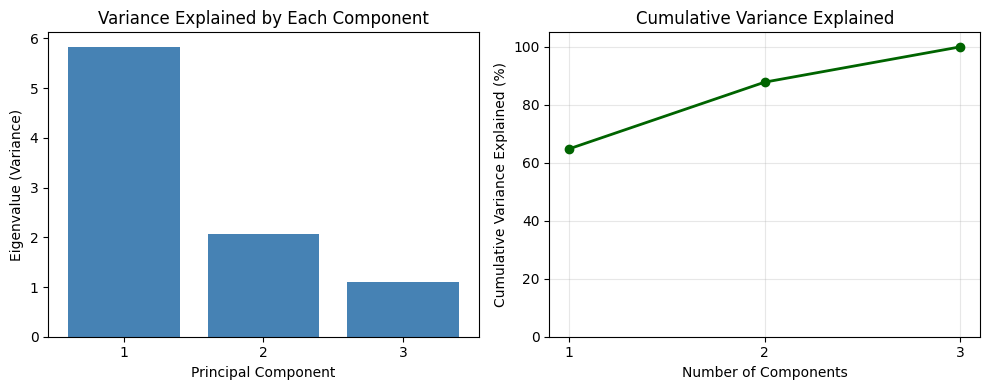

In [ ]:
eigenvalues, eigenvectors = demonstrate_eigen_decomposition()

# Visualize variance explained
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.bar(range(1, len(eigenvalues) + 1), eigenvalues, color='steelblue')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue (Variance)')
plt.title('Variance Explained by Each Component')
plt.xticks(range(1, len(eigenvalues) + 1))

plt.subplot(1, 2, 2)
cumsum = np.cumsum(eigenvalues) / np.sum(eigenvalues) * 100
plt.plot(range(1, len(eigenvalues) + 1), cumsum, 'o-', color='darkgreen', linewidth=2)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained (%)')
plt.title('Cumulative Variance Explained')
plt.grid(True, alpha=0.3)
plt.xticks(range(1, len(eigenvalues) + 1))
plt.ylim([0, 105])

plt.tight_layout()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)


Mounted at /content/gdrive


In [ ]:
import cv2
img_ref = cv2.imread(r'/content/gdrive/MyDrive/POET_2021/Da433_5_01_test_2.png')
print(img_ref.shape)

(600, 600, 3)


PCA RESULTS:

Principal Component 1:
  Eigenvalue: 0.046372
  Variance explained: 97.42%
  Direction: [-0.60756863 -0.57818543 -0.54457504]

Principal Component 2:
  Eigenvalue: 0.000894
  Variance explained: 1.88%
  Direction: [-0.68266203  0.02966604  0.73013182]

Principal Component 3:
  Eigenvalue: 0.000334
  Variance explained: 0.70%
  Direction: [ 0.4059962  -0.81536589  0.4127294 ]

Cumulative variance with 2 components: 99.30%


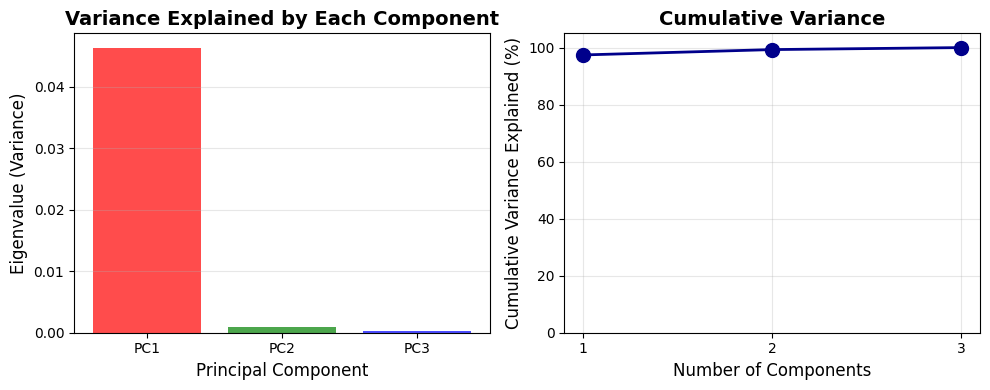

In [ ]:
def pca_on_image_colors(image):
    """
    Perform PCA on image color channels
    """
    # Reshape and normalize
    pixels = image.reshape(-1, 3).astype(np.float32) / 255.0

    # Center the data (subtract mean)
    mean = np.mean(pixels, axis=0)
    centered_pixels = pixels - mean

    # Compute covariance matrix
    cov_matrix = np.cov(centered_pixels.T)

    # Eigenvalue decomposition
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    # Sort by eigenvalue (descending)
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]

    print("="*60)
    print("PCA RESULTS:")
    print("="*60)

    total_variance = np.sum(eigenvalues)
    for i, (val, vec) in enumerate(zip(eigenvalues, eigenvectors.T)):
        percent = (val / total_variance) * 100
        print(f"\nPrincipal Component {i+1}:")
        print(f"  Eigenvalue: {val:.6f}")
        print(f"  Variance explained: {percent:.2f}%")
        print(f"  Direction: {vec}")

    # Cumulative variance
    cumsum = np.cumsum(eigenvalues) / total_variance * 100
    print(f"\nCumulative variance with 2 components: {cumsum[1]:.2f}%")

    return eigenvalues, eigenvectors, mean
# Run PCA
eigenvalues, eigenvectors, mean = pca_on_image_colors(img_ref)

# Visualize eigenvalues
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.bar([1, 2, 3], eigenvalues, color=['red', 'green', 'blue'], alpha=0.7)
plt.xlabel('Principal Component', fontsize=12)
plt.ylabel('Eigenvalue (Variance)', fontsize=12)
plt.title('Variance Explained by Each Component', fontsize=14, fontweight='bold')
plt.xticks([1, 2, 3], ['PC1', 'PC2', 'PC3'])
plt.grid(True, alpha=0.3, axis='y')

plt.subplot(1, 2, 2)
cumsum = np.cumsum(eigenvalues) / np.sum(eigenvalues) * 100
plt.plot([1, 2, 3], cumsum, 'o-', linewidth=2, markersize=10, color='darkblue')
plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('Cumulative Variance Explained (%)', fontsize=12)
plt.title('Cumulative Variance', fontsize=14, fontweight='bold')
plt.xticks([1, 2, 3])
plt.ylim([0, 105])
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
## Matrices and Dot products

# ============================================================================
# PART 3: MATRIX OPERATIONS
# ============================================================================

print("PART 3: MATRIX OPERATIONS")

#Dot product of matrices of same dimensions

M1 = np.random.rand(3, 3)
M2 = np.random.rand(3, 3)

result = np.dot(M1, M2)
print('Dot product of matrices of same dimensions')
print(result, result.shape)


# Dot product of matrices of different dimensions

M3 = np.random.rand(3, 4)
M4 = np.random.rand(4, 2)

result_dd = np.dot(M3, M4)
print('Dot product of matrices of different dimensions')
print(result_dd, result_dd.shape)


PART 3: MATRIX OPERATIONS
Dot product of matrices of same dimensions
[[0.42677376 0.67870734 1.29824009]
 [0.42601455 0.61237708 1.42999444]
 [0.19713526 0.24429547 0.73989996]] (3, 3)
Dot product of matrices of different dimensions
[[0.40714664 0.47601903]
 [1.86490292 1.94265364]
 [1.35288253 1.58614321]] (3, 2)
